In [1]:
using Plots, Distributions, Random

# Simple SIR model

In [2]:
mutable struct Model_State
    I::Float64
    S::Float64
    R::Float64
end

function transition!(s::Model_State, χ::Float64, μ=1.0::FLoat64)
    # χ probability of being recovered
    # μ probability of catching the disease
    i_update = s.I * (1 - χ + μ * s.S)
    s_update = s.S * (1 - μ * s.I)
    r_update = s.R + χ * s.I
    s.I = i_update
    s.S = s_update
    s.R = r_update
    return
end    

function model_simulate!(s::Model_State, period::Int, χ::Float64, μ=1.0::FLoat64)
    for t in range(1,period)
        transition!(s,χ,μ)
    end
end

model_simulate! (generic function with 2 methods)

┌ Info: Saved animation to /var/folders/5f/1t5lz7t9659g_zvqs5c0tx180000gn/T/jl_TKfARYRsXQ.gif
└ @ Plots /Users/prld/.julia/packages/Plots/HyyIK/src/animation.jl:156


Plots.AnimatedGif("/var/folders/5f/1t5lz7t9659g_zvqs5c0tx180000gn/T/jl_TKfARYRsXQ.gif")
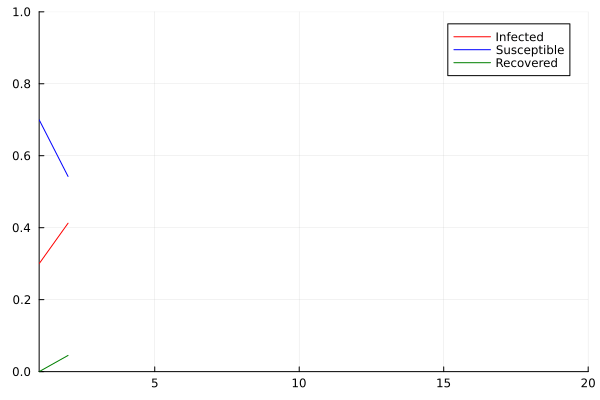

In [3]:
# Initialize state :
I0 = 0.3; S0=0.7; R0=0.0; χ=0.15; μ=0.75;
s = Model_State(I0, S0, R0)

# Initialize plot :
plt = plot([1],[s.I], xlim=(1,20), ylim=(0,1), c=:red, legend=:topright, label="Infected")
plot!([1],[s.S], c=:blue, label="Susceptible")
plot!([1],[s.R], c=:green, label="Recovered")

@gif for i in 2:20
    transition!(s,χ,μ)
    append!(plt,1,i,s.I)
    append!(plt,2,i,s.S)
    append!(plt,3,i,s.R)
end fps = 10

# A Spatial SIR model

In [4]:
# Number of agents
N = 100

# Initialize state :
I0 = 0.3; S0=1-I0; R0=0.0;
χ=0.15; μ=0.75;
d = Normal(0,0.1)

mutable struct Agent
    x::Float64
    y::Float64
    h::String
end

#systeme = [Agent(rand(),rand(),"I") for i in range(1,round(I0*N))]
#append!(systeme,[Agent(rand(),rand(),"S") for i in range(1,N-round(I0*N))])

  0.054504 seconds (250.98 k allocations: 8.507 MiB, 8.20% gc time, 95.08% compilation time)


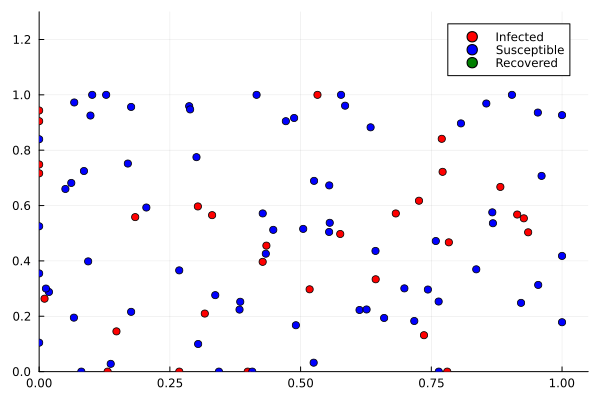

In [5]:
function spatial_transition(S::Vector{Agent})
    S_temp = copy(S)
    for agt in S_temp
        agt.x = min(max(agt.x + rand(d),0),1)
        agt.y = min(max(agt.y + rand(d),0),1)
    end
    return S_temp
end


function random_guess(T=100)
    # Define and Initialize system
    S = [Agent(rand(),rand(),"I") for i in range(1,round(I0*N))]
    append!(S,[Agent(rand(),rand(),"S") for i in range(1,N-round(I0*N))])

    for i in range(1,T)
        S = spatial_transition(S)
    end
    return S
end
@time[random_guess()]

function show_population(S::Vector{Agent})
    color = Dict("I"=>:red, "S"=>:blue, "R"=>:green)
    label = Dict("I"=>"Infected", "S"=>"Susceptible", "R"=>"Recovered")
    fig = plot(xlim=(0,1.05), ylim=(0,1.3), legend=:topright)

    for id in ["I","S","R"]
        sub = [x for x in S if x.h == id]
        scatter!(fig, [(agent.x,agent.y) for agent in sub], mc=color[id],label=label[id])
    end
    return fig
end

show_population(random_guess())

# OTHER

In [ ]:
rt = random_guess()

In [ ]:
scatter(rt)

In [ ]:
test = plot([1,2],[0.5,0.6], xlim=(1,50), ylim=(0,1), c=:red, legend=:topright, label="test1")
plot!([1,2,3],[0.2,0.3,0.4], c=:blue, label="test2")
append!(test,2,20,0.8)

In [ ]:
test